In [154]:
from time import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import random
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler, Imputer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer 
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from scipy.stats import randint
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn import metrics
from catboost import CatBoostClassifier
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'


#### Loading scraped data

In [3]:
import pickle
data = pickle.load( open( "data_df_clean.p", "rb" ) )

#### Creating new "total_reviews" and "rating_class" variables

In [5]:
data['total_reviews'] = data.user_reviews + data.critic_reviews
data['rating_class'] = data.rating.map(lambda x: 1 if x >= 8 else 0)

#### Creating predictors and target 

In [ ]:
X = data.drop(['id', 'name','rating', 'rating_class'], axis=1)
y = data.rating.values

#### Train/Test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=412)

#### Vectorize columns using CountVectorizer

In [89]:
cvr = CountVectorizer(binary=True, 
                      strip_accents='unicode',
                      max_features = 100,
                      tokenizer=(lambda x: x.split('|')))

X_train_cast = cvr.fit_transform(X_train.cast).todense()
names = cvr.get_feature_names()
cast_df = pd.DataFrame(X_train_cast, columns=names)

for i in cast_df.columns:
    X_train.insert(len(X_train.columns)-1,"actor_"+i,cast_df[i].values)


X_test_cast = cvr.transform(X_test.cast).todense()
names = cvr.get_feature_names()
cast_df = pd.DataFrame(X_test_cast, columns=names)

for i in cast_df.columns:
    X_test.insert(len(X_test.columns)-1,"actor_"+i,cast_df[i].values)


cvr = CountVectorizer(binary=True, 
                      strip_accents='unicode')

X_train_genre = cvr.fit_transform(X_train.genre).todense()
names = cvr.get_feature_names()
genre_df = pd.DataFrame(X_train_genre, columns=names)

for i in genre_df.columns:
    X_train.insert(len(X_train.columns)-1,"genre_"+i,genre_df[i].values)
X_train = X_train.drop(['genre', 'cast'], axis=1)

X_test_genre = cvr.transform(X_test.genre).todense()
names = cvr.get_feature_names()
genre_df = pd.DataFrame(X_test_genre, columns=names)

for i in genre_df.columns:
    X_test.insert(len(X_test.columns)-1,"genre_"+i,genre_df[i].values)
X_test = X_test.drop(['genre', 'cast'], axis=1)

#### Standardize the predictors' variables

In [ ]:
ss = StandardScaler()

Xs_train = ss.fit_transform(X_train)

Xs_test = ss.transform(X_test)

#### Cross-validation: evaluating estimator performance
<li> every estimator exposes a score method that can judge the quality of the fit (or the prediction) on new data.

In [156]:
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
knn = KNeighborsClassifier()
lr = LogisticRegression()
bn = BernoulliNB()
svc = SVC()
dtc = DecisionTreeClassifier()
bc = BaggingClassifier(base_estimator=dtc, n_estimators=500, n_jobs=2)
rf = RandomForestClassifier()
et = ExtraTreeClassifier()
ab = AdaBoostClassifierCatBoost### To understand which functions are more important for rating forecasting, I will use the following models:
<li> DecisionTreeRegressor model
<li> AdaBoostRegressor model
<li> BaggingRegressor model
<li> RandomForestRegressor model
<li> GradientBoostingRegressor model(base_estimator=dtc, n_estimators=500)
gb = GradientBoostingClassifier(n_estimators=1000)
catboost = CatBoostClassifier()
def score(model, name):
    s = cross_val_score(model, Xs_train, y_train, cv=cv)
    print("{} CV Score:\t{:0.3} ± {:0.3}".format(name, s.mean().round(3), s.std().round(3)))
    model.fit(Xs_train,y_train)
    y_pred = model.predict(Xs_test)
    print "Baseline score:\t {:.2f}".format(1 - y.mean())
    print "Train score:\t {:.2f}".format(model.score(Xs_train, y_train))
    print "Test score:\t {:.2f}\n".format(model.score(Xs_test, y_test))

score(knn, "KNeighbors")
score(lr, "Logistic Regression")
score(bn, "BernoulliNB")
score(svc, "SVC")
score(dtc, "Decision Tree")
score(bc, "Bagging DT")
score(rf, "Random Forest")
score(et, "Extra Trees")
score(ab, "Ada Boost")
score(gb, "Gradient Boost")
score(catboost, "CatBoost")

KNeighbors CV Score:	0.698 ± 0.002
Baseline score:	 0.71
Train score:	 0.80
Test score:	 0.71

Logistic Regression CV Score:	0.731 ± 0.01
Baseline score:	 0.71
Train score:	 0.75
Test score:	 0.71

BernoulliNB CV Score:	0.705 ± 0.018
Baseline score:	 0.71
Train score:	 0.72
Test score:	 0.69

SVC CV Score:	0.72 ± 0.003
Baseline score:	 0.71
Train score:	 0.76
Test score:	 0.71

Decision Tree CV Score:	0.651 ± 0.008
Baseline score:	 0.71
Train score:	 1.00
Test score:	 0.65

Bagging DT CV Score:	0.736 ± 0.012
Baseline score:	 0.71
Train score:	 1.00
Test score:	 0.74

Random Forest CV Score:	0.728 ± 0.004
Baseline score:	 0.71
Train score:	 0.98
Test score:	 0.74

Extra Trees CV Score:	0.653 ± 0.006
Baseline score:	 0.71
Train score:	 1.00
Test score:	 0.66

Ada Boost CV Score:	0.65 ± 0.002
Baseline score:	 0.71
Train score:	 1.00
Test score:	 0.65

Gradient Boost CV Score:	0.744 ± 0.007
Baseline score:	 0.71
Train score:	 0.92
Test score:	 0.74

CatBoost CV Score:	0.753 ± 0.01
Baseline

### To understand which functions are more important for rating forecasting, I will use the following models:
<li> DecisionTreeRegressor model
<li> AdaBoostRegressor model
<li> BaggingRegressor model
<li> RandomForestRegressor model
<li> GradientBoostingRegressor model

### DecisionTreeClassifier model

In [50]:
# parameters to tune
param_grid = {"splitter": ["best", "random"],
              "max_depth": [None, 3, 5],
              "max_features": [1.0, 0.5, 0.1],
              "min_samples_split": [2, 3, 4],
              "min_samples_leaf": [10, 15, 20],
              "criterion": ["gini", "entropy"]}
dtc = DecisionTreeClassifier()
grid_search_dtc = GridSearchCV(dtc, param_grid=param_grid, verbose=1, cv=cv, n_jobs=2)
grid_search_dtc.fit(Xs_train, y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


[Parallel(n_jobs=2)]: Done 240 tasks      | elapsed:    3.1s
[Parallel(n_jobs=2)]: Done 972 out of 972 | elapsed:   11.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=2,
       param_grid={'splitter': ['best', 'random'], 'min_samples_leaf': [10, 15, 20], 'min_samples_split': [2, 3, 4], 'criterion': ['gini', 'entropy'], 'max_features': [1.0, 0.5, 0.1], 'max_depth': [None, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [59]:
# best model estimator
dtc_best_model = grid_search_dtc.best_estimator_
print "Best model:\n",dtc_best_model

Best model:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=0.5, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


In [57]:
# best tuned parameters
dtc_best_parameters = grid_search_dtc.best_params_
print "Best parameters:\n", dtc_best_parameters

Best parameters:
{'splitter': 'best', 'min_samples_leaf': 10, 'min_samples_split': 2, 'criterion': 'gini', 'max_features': 0.5, 'max_depth': 5}


In [61]:
# best score
dtc_best_score = dtc_best_model.score(Xs_test, y_test)
print "Baseline score:\t", 1 - y.mean()
print "Best score:\t",dtc_best_score

Baseline score:	0.705705102451
Best score:	0.71686746988


In [62]:
# model predictions
y_pred = dtc_best_model.predict(Xs_test)

#### Top 10 important features

In [64]:
dtc_feature_importances = pd.DataFrame(dtc_best_model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance'])
top_10 = dtc_feature_importances.sort_values(by='importance', ascending=True).tail(10)

In [65]:
top_10.sort_values(by='importance', ascending=False)

,importance
votes,0.307296
total_reviews,0.267620
critic_reviews,0.119056
genre_documentary,0.081514
runtime_tvmaze,0.078477
user_reviews,0.049409
n_episodes,0.041097
genre_action,0.021900
genre_drama,0.018653
start_date,0.014978


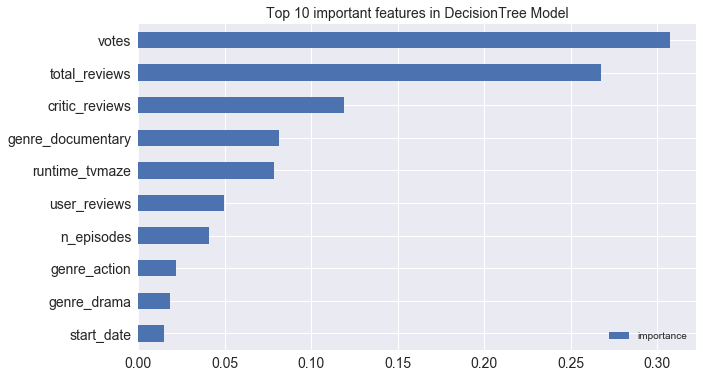

In [66]:
top_10.plot(kind = "barh", figsize=(10,6), fontsize=14)
plt.title("Top 10 important features in DecisionTree Model", fontsize=14)
plt.show()

### AdaBoostClassifier model

In [112]:
# parameters to tune
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [10, 20, 30, 400]
             }
dtc = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=0.5, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
abc = AdaBoostClassifier(base_estimator = dtc)

# run grid search
grid_search_abc = GridSearchCV(abc, param_grid=param_grid, cv=cv, n_jobs=2, verbose=1)
grid_search_abc.fit(Xs_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=2)]: Done  48 out of  48 | elapsed:   30.2s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
       error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=0.5, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params={}, iid=True, n_jobs=2,
       param_grid={'n_estimators': [10, 20, 30, 400], 'base_estimator__criterion': ['gini', 'entropy'], 'base_estimator__splitter': ['best', 'random']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [113]:
# best model estimator
abc_best_model = grid_search_abc.best_estimator_
print "Best model:\n",abc_best_model

Best model:
AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=0.5, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='random'),
          learning_rate=1.0, n_estimators=30, random_state=None)


In [114]:
# best tuned parameters
abc_best_parameters = grid_search_abc.best_params_
print "Best parameters:\n", abc_best_parameters

Best parameters:
{'n_estimators': 30, 'base_estimator__criterion': 'entropy', 'base_estimator__splitter': 'random'}


In [115]:
# best score
abc_best_score = abc_best_model.score(Xs_test, y_test)
print "Baseline score:\t", 1 - y.mean()
print "Best score:\t", abc_best_score

Baseline score:	0.705705102451
Best score:	0.724899598394


In [116]:
# model predictions
y_pred = abc_best_model.predict(Xs_test)

#### Top 10 important features

In [117]:
abc_feature_importances = pd.DataFrame(abc_best_model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance'])
top_10 = abc_feature_importances.sort_values(by='importance', ascending=True).tail(10)

In [118]:
top_10.sort_values(by='importance', ascending=False)

,importance
critic_reviews,0.069680
n_episodes,0.058330
user_reviews,0.054320
votes,0.047549
start_date,0.035228
runtime_tvmaze,0.032840
actor_wendey stanzler,0.024131
total_reviews,0.020596
actor_andrew bernstein,0.018310
actor_patrick r. norris,0.015952


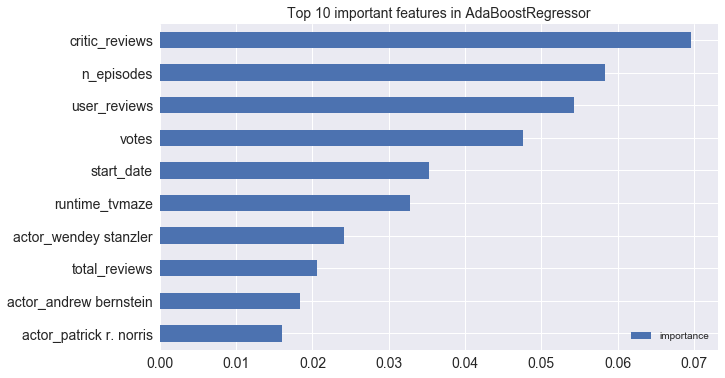

In [119]:
top_10.plot(kind = "barh", figsize=(10,6), fontsize=14)
plt.title("Top 10 important features in AdaBoostRegressor", fontsize=14)
plt.show()

### BaggingClassifier model

In [120]:
# parameters to tune
param_grid = {"n_estimators": [400, 500, 600],
              "max_samples": [1.0, 0.5, 0.1],
              "max_features": [1.0, 0.5, 0.1]
             }
bc = BaggingClassifier(base_estimator=dtc, n_jobs=2)

# run grid search
grid_search_bc = GridSearchCV(bc, param_grid=param_grid, cv=cv, n_jobs=2, verbose=1)
grid_search_bc.fit(Xs_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


/Users/iurigo/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/Users/iurigo/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  2.5min
[Parallel(n_jobs=2)]: Done  81 out of  81 | elapsed:  3.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
       error_score='raise',
       estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=0.5, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
           ...n_estimators=10, n_jobs=2, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=2,
       param_grid={'n_estimators': [400, 500, 600], 'max_samples': [1.0, 0.5, 0.1], 'max_features': [1.0, 0.5, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [121]:
# best model estimator
bc_best_model = grid_search_bc.best_estimator_
print "Best model:\n", bc_best_model

Best model:
BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=0.5, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.5, n_estimators=600, n_jobs=2, oob_score=False,
         random_state=None, verbose=0, warm_start=False)


In [122]:
# best tuned parameters
bc_best_parameters = grid_search_bc.best_params_
print "Best parameters:\n", bc_best_parameters

Best parameters:
{'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 600}


In [123]:
# best score
bc_best_score = bc_best_model.score(Xs_test, y_test)
print "Baseline score:\t", 1 - y.mean()
print "Best score:\t", bc_best_score

Baseline score:	0.705705102451
Best score:	0.736947791165


In [125]:
# model predictions
y_pred = bc_best_model.predict(Xs_test)

#### Top 10 important features

In [127]:
bc_feature_importances = np.mean([
    tree.feature_importances_ for tree in bc_best_model.estimators_
], axis=0)

In [128]:
bc_feature_importances_df = pd.DataFrame(bc_feature_importances,
                                   index = X_train.columns,
                                    columns=['importance'])
top_10 = bc_feature_importances_df.sort_values(by='importance', ascending=True).tail(10)

In [129]:
top_10.sort_values(by='importance', ascending=False)

,importance
votes,0.303382
critic_reviews,0.184015
genre_documentary,0.133954
n_episodes,0.106233
total_reviews,0.083109
start_date,0.060001
user_reviews,0.055721
runtime_tvmaze,0.036021
genre_action,0.008290
genre_animation,0.007195


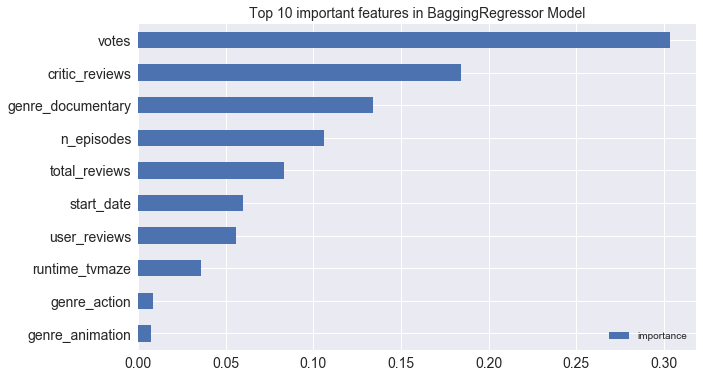

In [130]:
top_10.plot(kind = "barh", figsize=(10,6), fontsize=14)
plt.title("Top 10 important features in BaggingRegressor Model", fontsize=14)
plt.show()

### RandomForestClassifier model

In [131]:
# parameters to tune
param_grid = {"n_estimators": [190, 200, 210],
              "bootstrap": [True, False],
              "min_samples_leaf": [1, 2, 3],
              "max_features": [1.0, 0.5, 0.1],
              "max_depth": [None, 3, 5]
             }
rf = RandomForestClassifier()
grid_search_rf = GridSearchCV(rf, param_grid=param_grid, verbose=1, cv=cv, n_jobs=2)
grid_search_rf.fit(Xs_train, y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  1.8min
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  4.6min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed: 11.3min
[Parallel(n_jobs=2)]: Done 486 out of 486 | elapsed: 12.0min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=2,
       param_grid={'n_estimators': [190, 200, 210], 'max_features': [1.0, 0.5, 0.1], 'bootstrap': [True, False], 'max_depth': [None, 3, 5], 'min_samples_leaf': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [132]:
# best model estimator
rf_best_model = grid_search_rf.best_estimator_
print "Best model:\n", rf_best_model

Best model:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.1, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=190, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


In [133]:
# best tuned parameters
rf_best_parameters = grid_search_rf.best_params_
print "Best parameters:\n", rf_best_parameters

Best parameters:
{'max_features': 0.1, 'n_estimators': 190, 'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1}


In [134]:
# best score
rf_best_score = rf_best_model.score(Xs_test, y_test)
print "Baseline score:\t", 1 - y.mean()
print "Best score:\t", rf_best_score

Baseline score:	0.705705102451
Best score:	0.741967871486


In [135]:
# model predictions
y_pred = rf_best_model.predict(Xs_test)

#### Top 10 important features

In [136]:
rf_feature_importances = pd.DataFrame(rf_best_model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance'])
top_10 = rf_feature_importances.sort_values(by='importance', ascending=True).tail(10)

In [137]:
top_10.sort_values(by='importance', ascending=False)

,importance
votes,0.172060
n_episodes,0.134763
start_date,0.121763
total_reviews,0.107158
user_reviews,0.102013
critic_reviews,0.089170
runtime_tvmaze,0.068579
genre_documentary,0.022428
genre_comedy,0.013415
genre_animation,0.011699


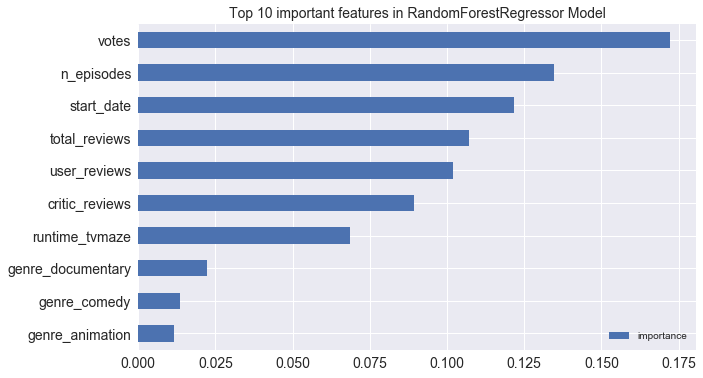

In [138]:
top_10.plot(kind = "barh", figsize=(10,6), fontsize=14)
plt.title("Top 10 important features in RandomForestRegressor Model", fontsize=14)
plt.show()

### GradientBoostingClassifier model

In [139]:
# parameters to tune
param_grid = {"learning_rate" : [0.5, 0.3, 0.1],
              "max_depth" :   [4,6,None],
              "min_samples_leaf": [3, 9, 17],
              "max_features": [1.0, 0.3, 0.1],
              "n_estimators": [1000]
              
             }
gb = GradientBoostingClassifier()
# run grid search
grid_search_gb = GridSearchCV(gb, param_grid=param_grid, verbose=1, cv=cv, n_jobs=2)
grid_search_gb.fit(Xs_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  3.4min
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed: 13.8min
[Parallel(n_jobs=2)]: Done 243 out of 243 | elapsed: 19.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
       error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=2,
       param_grid={'max_features': [1.0, 0.3, 0.1], 'n_estimators': [1000], 'learning_rate': [0.5, 0.3, 0.1], 'max_depth': [4, 6, None], 'min_samples_leaf': [3, 9, 17]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [140]:
# best model estimator
gb_best_model = grid_search_gb.best_estimator_
print "Best model:\n", gb_best_model

Best model:
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=0.1, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=3,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=1000, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)


In [141]:
# best tuned parameters
gb_best_parameters = grid_search_gb.best_params_
print "Best parameters:\n", gb_best_parameters

Best parameters:
{'max_features': 0.1, 'n_estimators': 1000, 'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 3}


In [142]:
# best score
gb_best_score = gb_best_model.score(Xs_test, y_test)
print "Baseline score:\t", 1 - y.mean()
print "Best score:\t", gb_best_score

Baseline score:	0.705705102451
Best score:	0.760040160643


In [143]:
# model predictions
y_pred = gb_best_model.predict(Xs_test)

#### Top 10 important features

In [144]:
gb_feature_importances = pd.DataFrame(gb_best_model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance'])
top_10 = gb_feature_importances.sort_values(by='importance', ascending=True).tail(10)

In [145]:
top_10.sort_values(by='importance', ascending=False)

,importance
votes,0.151563
n_episodes,0.117631
start_date,0.110117
user_reviews,0.099291
total_reviews,0.089767
critic_reviews,0.079946
runtime_tvmaze,0.067276
genre_animation,0.013564
genre_comedy,0.013444
genre_drama,0.012304


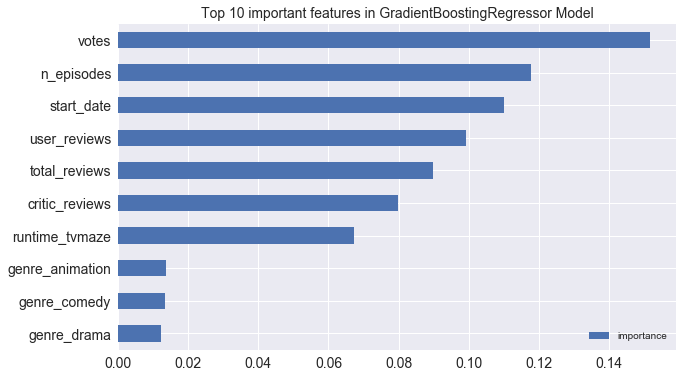

In [146]:
top_10.plot(kind = "barh", figsize=(10,6), fontsize=14)
plt.title("Top 10 important features in GradientBoostingRegressor Model", fontsize=14)
plt.show()

### Compare feature importance by each model

In [152]:
importances = pd.DataFrame(zip(dtc_best_model.feature_importances_,abc_best_model.feature_importances_,\
            bc_feature_importances, rf_best_model.feature_importances_,\
            gb_best_model.feature_importances_),
            index=X_train.columns, columns=['dtc_importance', 'abc_importance', 'bc_importance', 'rf_importance',\
                                           'gb_importance',]).sort_values('rf_importance',ascending=False)               
importances = importances.head(10)

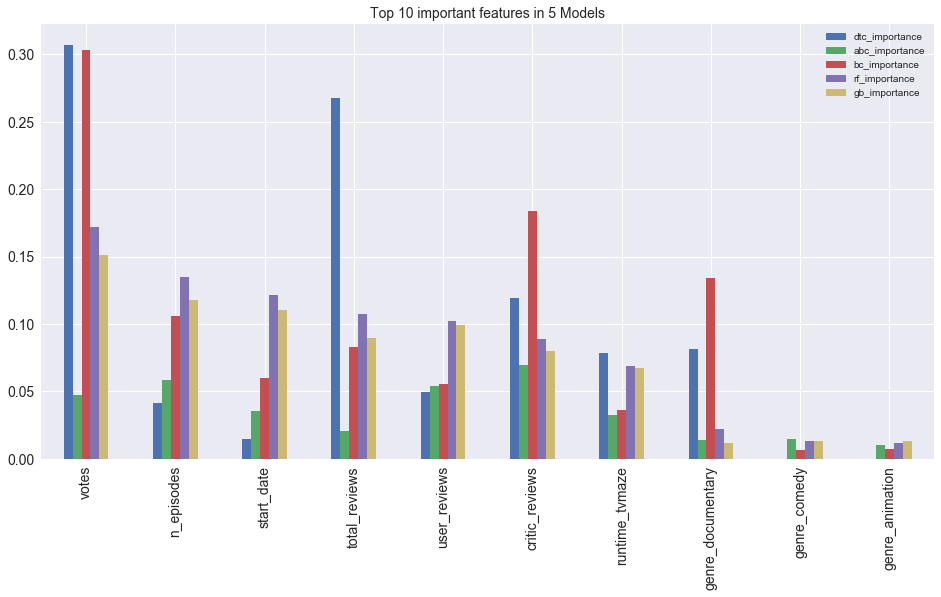

In [153]:
fig, ax = plt.subplots(figsize=(16,8))
importances.plot(kind='bar', ax=ax, fontsize=14)
plt.title("Top 10 important features in 5 Models", fontsize=14);


The above figure shows top ten features that have the most relative importance among all features included in our predictors matrix.
One of the key takeaways is that actors and directors may not be as important to creating all-time hit tv-shows as we might think since we dont find them in top ten of the feature importance ranking. Another key observation is that documentary, comedy, animation tv-shows are in top ten list of feature importance.